In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [2]:
boston = load_boston()

In [3]:
ds = pd.DataFrame(boston.data, columns=boston.feature_names)
ds['MEDV'] = boston.target

In [4]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
ds.shape

(506, 14)

In [6]:
feature = ds.columns

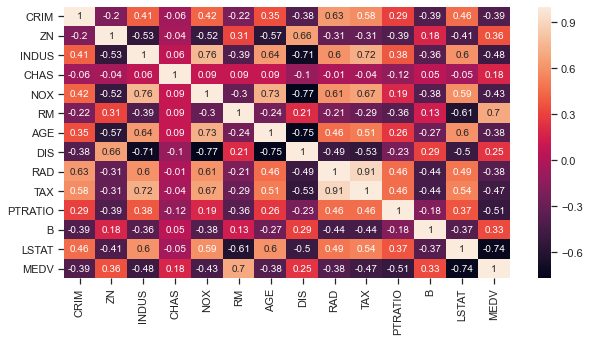

In [7]:
cormat = ds.corr().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(cormat,annot=True)

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
X= ds[boston.feature_names]
y= ds['MEDV']
Y = y

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state =5)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Boston_Model1=LinearRegression()
Boston_Model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
Model_preict1= Boston_Model1.predict(X_test)

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Model_preict1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Model_preict1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Model_preict1)))
print('R Squared:', metrics.r2_score(Y_test, Model_preict1))

Mean Absolute Error: 3.2132704958423584
Mean Squared Error: 20.86929218377049
Root Mean Squared Error: 4.568292042303172
R Squared: 0.7334492147453117


In [14]:
Y_test.to_list()[5:10]

[10.4, 23.9, 29.0, 22.8, 23.2]

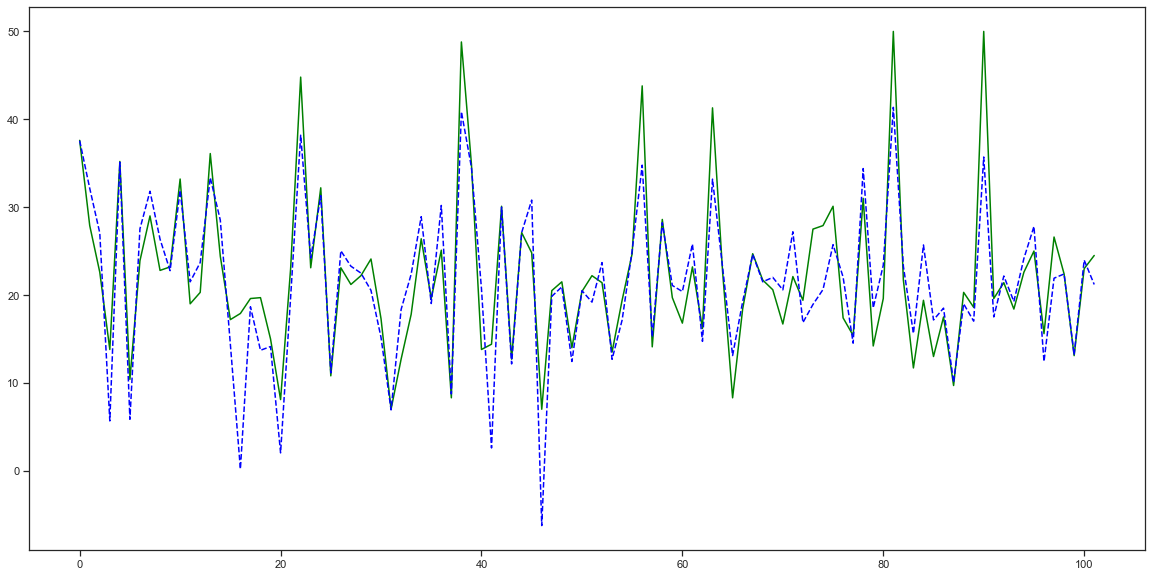

In [16]:
plt.figure(figsize=(20,10))
plt.plot(Y_test.to_list(), color = "green")
plt.plot(Model_preict1, color = "blue", linestyle = '--')

In [17]:
ds_new = ds
ds_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1

In [19]:
up=Q3+(1.5*IQR)
low=Q1-(1.5*IQR)

In [20]:
ds_new['CRIM'] = np.where(ds_new['CRIM']>up['CRIM'], ds['CRIM'].mean(),ds_new['CRIM'])
ds_new['ZN'] = np.where(ds_new['ZN']>up['ZN'], ds['ZN'].mean(),ds_new['ZN'])
ds_new['RM'] = np.where(ds_new['RM']>up['RM'], ds['RM'].mean(),ds_new['RM'])
ds_new['RM'] = np.where(ds_new['RM']<low['RM'], ds['RM'].mean(),ds_new['RM'])
ds_new['DIS'] = np.where(ds_new['DIS']>up['DIS'], ds['DIS'].mean(),ds_new['DIS'])
ds_new['B'] = np.where(ds_new['B']<low['B'], ds['B'].mean(),ds_new['B'])
ds_new['LSTAT'] = np.where(ds_new['LSTAT']>up['LSTAT'], ds['LSTAT'].mean(),ds_new['LSTAT'])
ds_new['MEDV'] = np.where(ds_new['MEDV']>up['MEDV'], ds['MEDV'].mean(),ds_new['MEDV'])

In [21]:
X= ds[boston.feature_names]
y= ds['MEDV']
Y = y
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state =10)

In [22]:
Boston_Model2=LinearRegression()
Boston_Model2.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
Model_preict2= Boston_Model2.predict(X_test)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Model_preict2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Model_preict2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Model_preict2)))
print('R Squared:', metrics.r2_score(Y_test, Model_preict2))

Mean Absolute Error: 2.9827651321760063
Mean Squared Error: 15.830527360943714
Root Mean Squared Error: 3.9787595253977983
R Squared: 0.5260505250741631


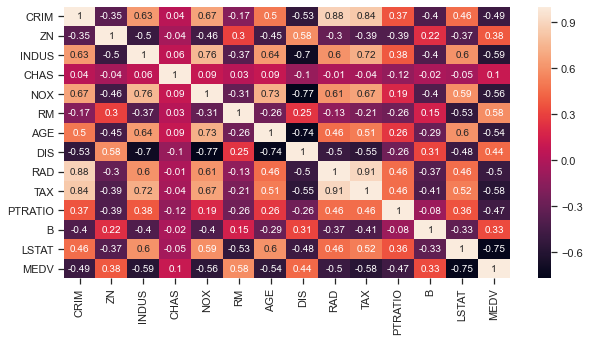

In [25]:
cormat = ds.corr().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(cormat,annot=True)

In [26]:
def get_correlted (corrdata, threshold):
    feature = []
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame (data=value, index=feature, columns=['corrValue'])
    return df

In [27]:
threshold = 0.5
corr_value = get_correlted(cormat['MEDV'], threshold)
corr_value

,corrValue
INDUS,-0.59
NOX,-0.56
RM,0.58
AGE,-0.54
TAX,-0.58
LSTAT,-0.75
MEDV,1.00


In [28]:
feature = ['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT' ]

In [29]:
X= ds_new[feature]
y= ds['MEDV']
Y = y

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state =10)



Boston_Model3=LinearRegression()
Boston_Model3.fit(X_train,Y_train)

Model_preict3= Boston_Model3.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Model_preict3))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Model_preict3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Model_preict3)))
print('R Squared:', metrics.r2_score(Y_test, Model_preict3))

Mean Absolute Error: 3.287814251695644
Mean Squared Error: 17.080723925832398
Root Mean Squared Error: 4.132883246092539
R Squared: 0.48862094411497536


In [30]:
Boston_Model3.score(X_test, Y_test)

0.4886209441149753

In [31]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = ds.columns
    vif["VIF"] = [variance_inflation_factor(ds.values, i) for i in range(ds.shape[1])]
    return(vif)

In [32]:
ds.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
calc_vif(ds)

,variables,VIF
0,CRIM,7.979574
1,ZN,2.303209
2,INDUS,14.220014
3,CHAS,1.159402
4,NOX,95.259315
5,RM,219.822352
6,AGE,20.940951
7,DIS,15.904135
8,RAD,21.167875
9,TAX,59.214318


In [35]:
feature = ['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT' ]

In [36]:
X= ds_new[feature]
y= ds['MEDV']
Y = y

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state =10)



Boston_Model4=LinearRegression()
Boston_Model4.fit(X_train,Y_train)

Model_preict4= Boston_Model4.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Model_preict4))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Model_preict4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Model_preict4)))
print('R Squared:', metrics.r2_score(Y_test, Model_preict4))

Mean Absolute Error: 3.287814251695644
Mean Squared Error: 17.080723925832398
Root Mean Squared Error: 4.132883246092539
R Squared: 0.48862094411497536


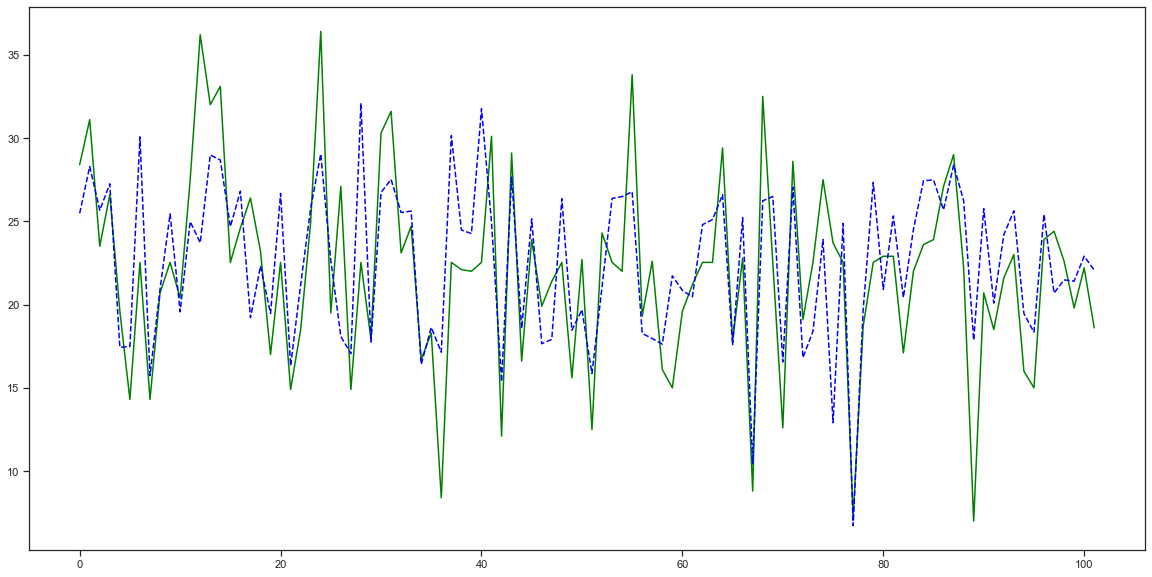

In [37]:
plt.figure(figsize=(20,10))
plt.plot(Y_test.to_list(), color = "green")
plt.plot(Model_preict3, color = "blue", linestyle = '--')

In [38]:
residuals = Model_preict4- Y_test
residuals.head()

305   -2.921709
193   -2.807916
65     2.162173
349    0.650018
151   -2.168151
Name: MEDV, dtype: float64

In [39]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.605823428348896


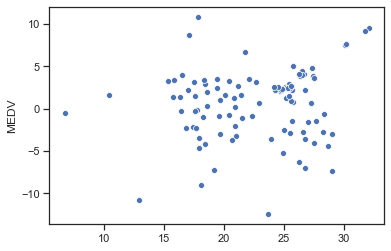

In [40]:
sns.scatterplot(Model_preict3, residuals)

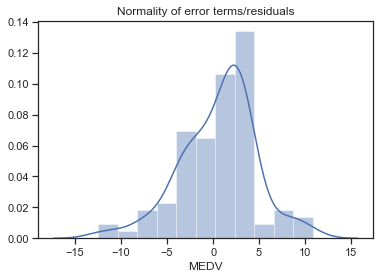

In [41]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')